# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair


## 1. Anomaly Detection (30 points)


In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [12, 4, 8, 10, 6, 2, 50]

Using a box plot, show the outliers in the box plot.

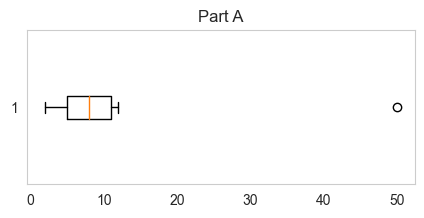

In [71]:
df_A = pd.DataFrame([12, 4, 8, 10, 6, 2, 50])

plt.figure(figsize = (5, 2))
plt.boxplot(df_A, vert = False)
plt.grid(False)
plt.title('Part A')
plt.show()

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

Outlier in value 50 with z-score 3.6619


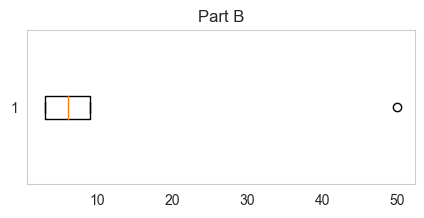

In [72]:
data_B = np.array([6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3])
data_B_mean = np.mean(data_B, axis = 0)
data_B_std = np.std(data_B, axis = 0)
data_B_z = (data_B - data_B_mean) / data_B_std

part_b_outliers = []
for i in range(len(data_B)):
    if data_B_z[i] > 3 or data_B_z[i] < -3:
        part_b_outliers.append([data_B[i], data_B_z[i]])

for i in part_b_outliers:
    print(f'Outlier in value {i[0]} with z-score {np.round(i[1], 4)}')

df_B = pd.DataFrame(data_B)

plt.figure(figsize = (5, 2))
plt.boxplot(df_B, vert = False)
plt.grid(False)
plt.title('Part B')
plt.show()

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then 

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(6 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

In [73]:
data_C = pd.read_csv('outlier_assignment.csv').loc[:, ('SalePrice', 'LotArea')]

In [74]:
def set_color(df, thre):
    cols = []
    for i in df:
        if i > thre or i < -thre:
            cols.append('red')
        else:
            cols.append('blue')
    return cols

##### Histograms, scatterplots, and boxplots

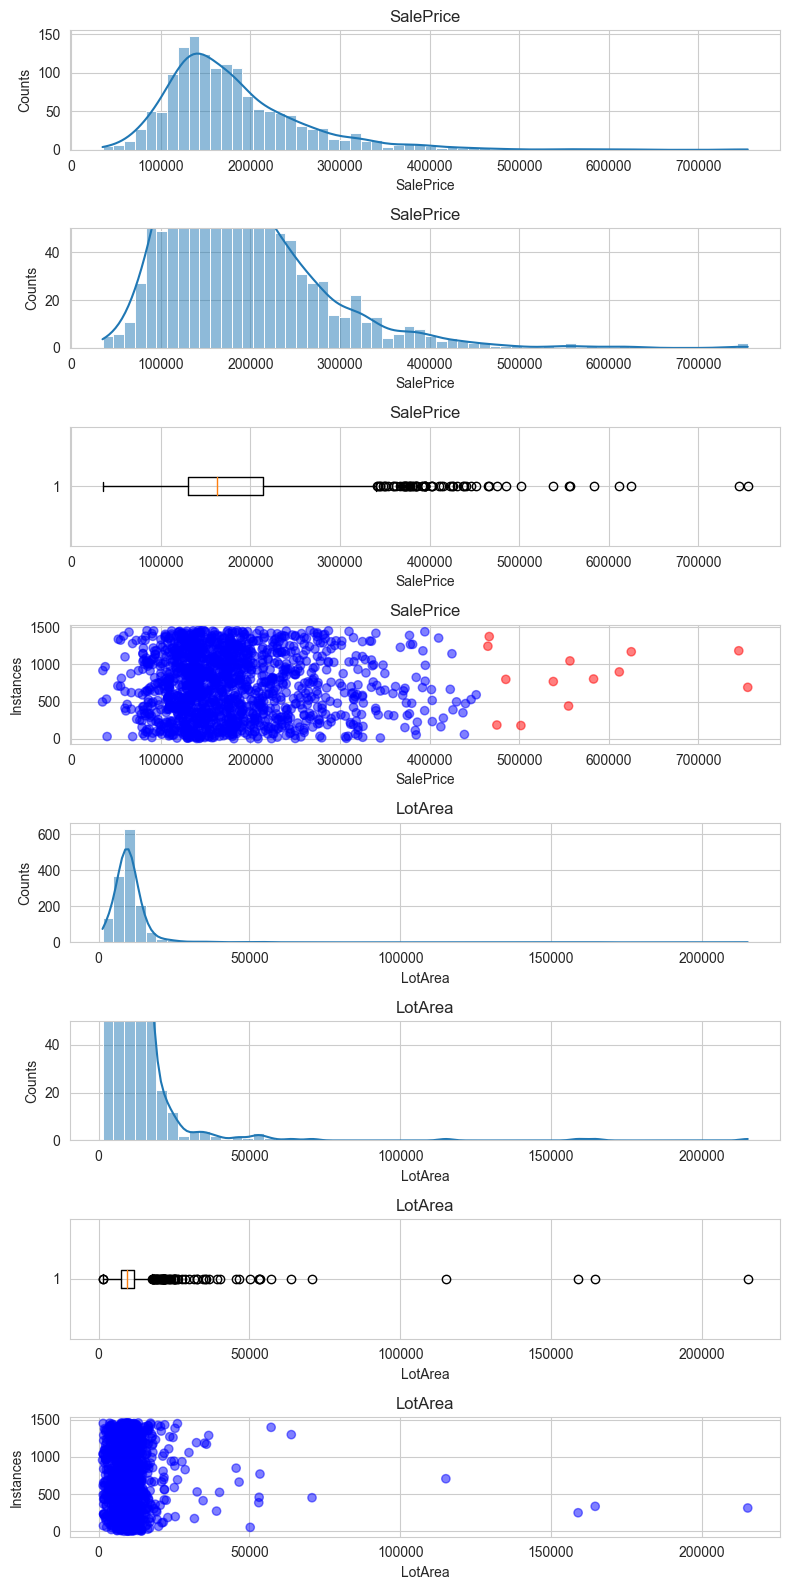

In [75]:
fig_1 = plt.figure(figsize = (8, 16))

plt.subplot(8, 1, 1)
sns.histplot(data_C.SalePrice, bins = 60, kde = True)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Counts')
plt.subplot(8, 1, 2)
sns.histplot(data_C.SalePrice, bins = 60, kde = True)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Counts')
plt.ylim([0, 50])
plt.subplot(8, 1, 3)
plt.boxplot(data_C.SalePrice, vert = False)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.subplot(8, 1, 4)
plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = set_color(data_C.SalePrice, data_C.SalePrice.mean() * 2.5), alpha = 0.5)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Instances')

plt.subplot(8, 1, 5)
sns.histplot(data_C.LotArea, bins = 60, kde = True)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Counts')
plt.subplot(8, 1, 6)
sns.histplot(data_C.LotArea, bins = 60, kde = True)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Counts')
plt.ylim([0, 50])
plt.subplot(8, 1, 7)
plt.boxplot(data_C.LotArea, vert = False)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.subplot(8, 1, 8)
plt.scatter(x = data_C.LotArea, y = range(data_C.shape[0]), c = set_color(data_C.LotArea, data_C.SalePrice.mean() * 2.5), alpha = 0.5)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Instances')

plt.tight_layout()
plt.show()

##### Z-score with 4 thresholds

In [76]:
sale_price = data_C.SalePrice
sale_price_mean = np.mean(sale_price, axis = 0)
sale_price_std = np.std(sale_price, axis = 0)
sale_price_z = (sale_price - sale_price_mean) / sale_price_std

sp_df = pd.DataFrame(sale_price_z)

In [77]:
thresholds = [[1, -1], [2, -2], [3, -3], [4, -4], [5, -5]]

outliers = []
colors = []
for positive, negative in thresholds:
    outliers.append(0)
    colors.append([])
    for i in sp_df.values:
        if i > positive or i < negative:
            outliers[-1] += 1
            colors[-1].append('r')
        else:
            colors[-1].append('b')
    print(f'Number of points that are classified as outliers when [positive threshold, negative threshold] is [{positive}, {negative}]: {outliers[-1]}')

Number of points that are classified as outliers when [positive threshold, negative threshold] is [1, -1]: 315
Number of points that are classified as outliers when [positive threshold, negative threshold] is [2, -2]: 63
Number of points that are classified as outliers when [positive threshold, negative threshold] is [3, -3]: 22
Number of points that are classified as outliers when [positive threshold, negative threshold] is [4, -4]: 9
Number of points that are classified as outliers when [positive threshold, negative threshold] is [5, -5]: 5


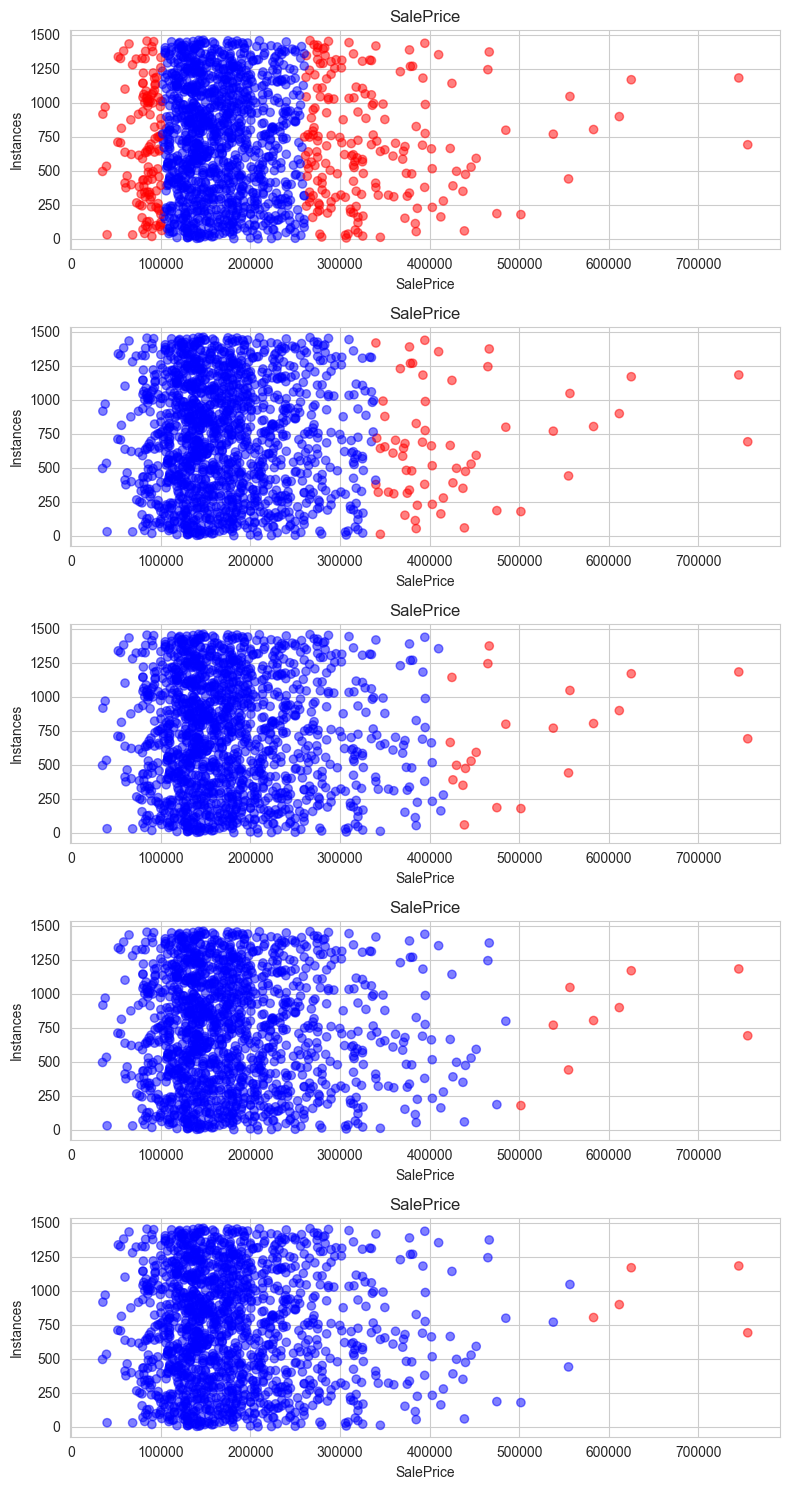

In [78]:
fig_2 = plt.figure(figsize = (8, 15))

for i in range(len(thresholds)):
    plt.subplot(len(thresholds), 1, i + 1)
    plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = colors[i], alpha = 0.5)
    plt.title('SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Instances')

plt.tight_layout()
plt.show()

##### Number of outliers removed when threshold = 3

Number of outliers removed when threshold is 3 (and -3):  22


<function matplotlib.pyplot.show(close=None, block=None)>

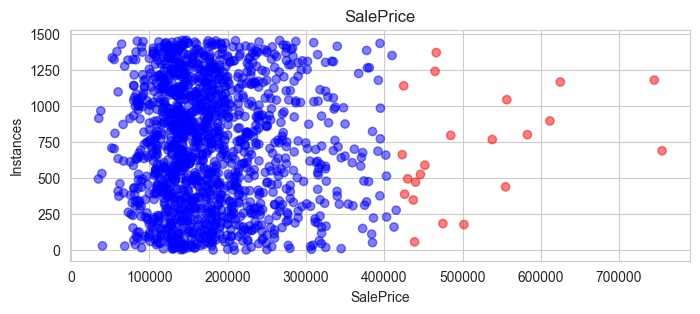

In [79]:
sp_inliers = []
sp_outliers = []

for i in range(len(data_C.SalePrice.values)):
    if colors[2][i] == 'r':
        sp_outliers.append(data_C.SalePrice.values[i])
    else:
        sp_inliers.append(data_C.SalePrice.values[i])

print('Number of outliers removed when threshold is 3 (and -3): ', len(sp_outliers))

fig_3 = plt.figure(figsize = (8, 3))
plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = colors[2], alpha = 0.5)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Instances')
plt.show

##### LocalOutlierFactor

In [82]:
# Get the outliers in LotArea
Lot_Area = data_C.LotArea
Lot_Area_mean = np.mean(Lot_Area, axis = 0)
Lot_Area_std = np.std(Lot_Area, axis = 0)
Lot_Area_z = (Lot_Area - Lot_Area_mean) / Lot_Area_std

la_df = pd.DataFrame(Lot_Area_z)

la_inliers = []
la_outliers = []

for i in range(len(la_df.values)):
    if la_df.values[i] > 3 or la_df.values[i] < -3:
        la_outliers.append(la_df.values[i][0])
    else:
        la_inliers.append(la_df.values[i][0])
sp = np.r_[sp_inliers, sp_outliers]
la = np.r_[la_inliers, la_outliers]

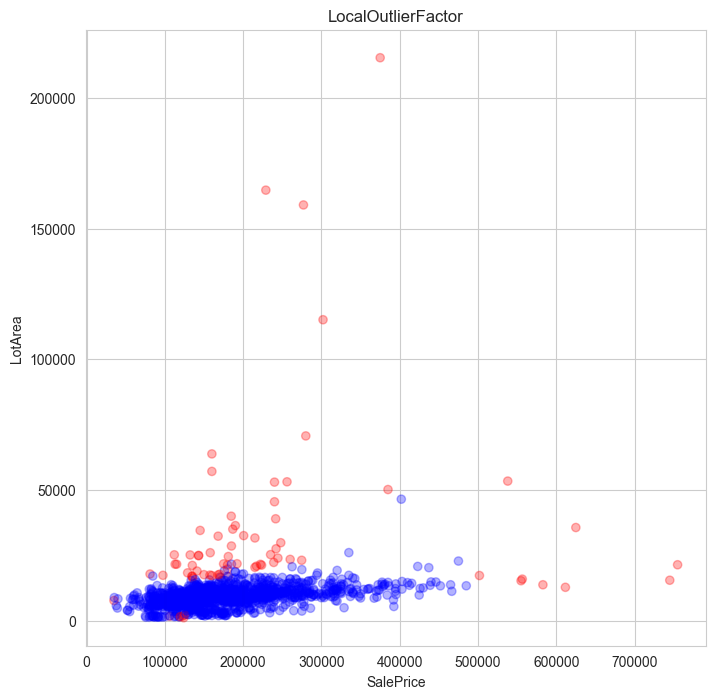

In [83]:
instances = data_C.values

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.05)
y_pred = clf.fit_predict(instances)

LOF_colors = []
for pred in y_pred:
    if pred == -1:
        LOF_colors.append('r')
    else:
        LOF_colors.append('b')

fig_4 = plt.figure(figsize = (8, 8))
plt.scatter(x = instances[:, 0], y = instances[:, 1], c = LOF_colors, alpha = 0.3)
plt.title('LocalOutlierFactor')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()